Number of ENVISAT files: 117
processing month0207
dist: [1804976.2 1804616.1 1804257.1 ... 2472023.2 2472381.8 2472740.5]
processing month0208
dist: [1730155.9 1729799.2 1729441.5 ... 2672271.5 2672631.8 2672990.8]
processing month0209
dist: [1886341.8 1885981.1 1885621.6 ... 2336009.2 2336369.2 2336728. ]
processing month0210
dist: [1893553.5 1893195.4 1892836.2 ... 2505857.  2506215.8 2506574.5]
processing month0211
dist: [1847224.9 1846865.8 1846506.8 ... 3008509.5 3008868.  3009226.2]
processing month0212
dist: [1837351.2 1836992.  1836631.6 ... 2435364.2 2435723.  2436083.2]
processing month0301
dist: [1810053.  1809694.1 1809335.4 ... 2527396.5 2527755.2 2528115.2]
processing month0302
dist: [1877252.4 1878541.9 1878184.4 ... 2670165.2 2670524.  2670884. ]
processing month0303
dist: [1798480.     1798118.9    1797759.     ...   72644.05      7433.2695
  355067.5   ]
processing month0304
dist: [1831867.6 1580685.9 1855940.1 ... 2588839.5 2589197.5 2589555.8]
processing month0305
d

/Users/iw2g24/PycharmProjects/SSH_project/.venv1/lib/python3.12/site-packages/numpy/lib/stride_tricks.py:538: UserWarning: Warning: converting a masked element to nan.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]


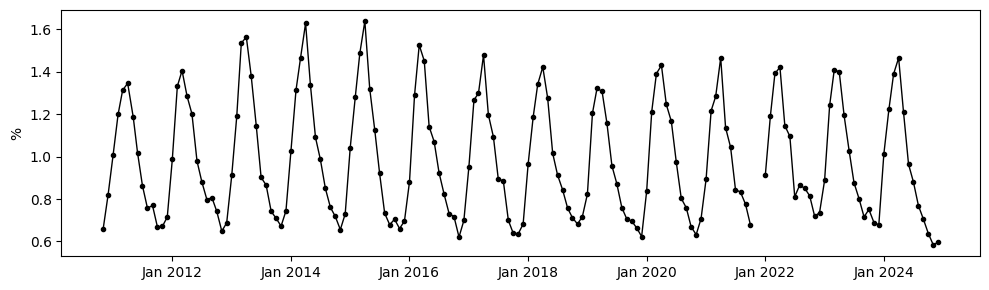

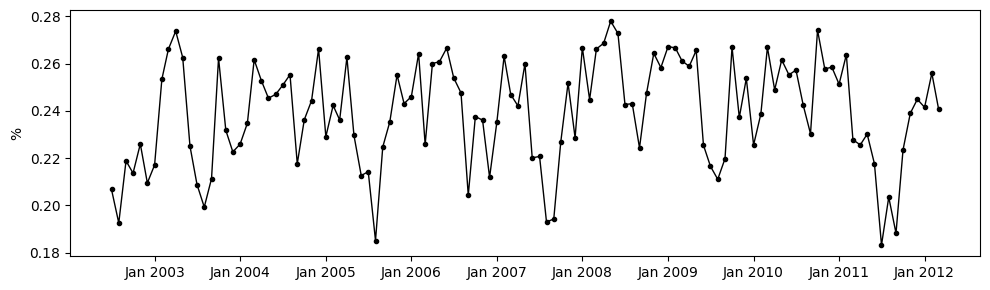

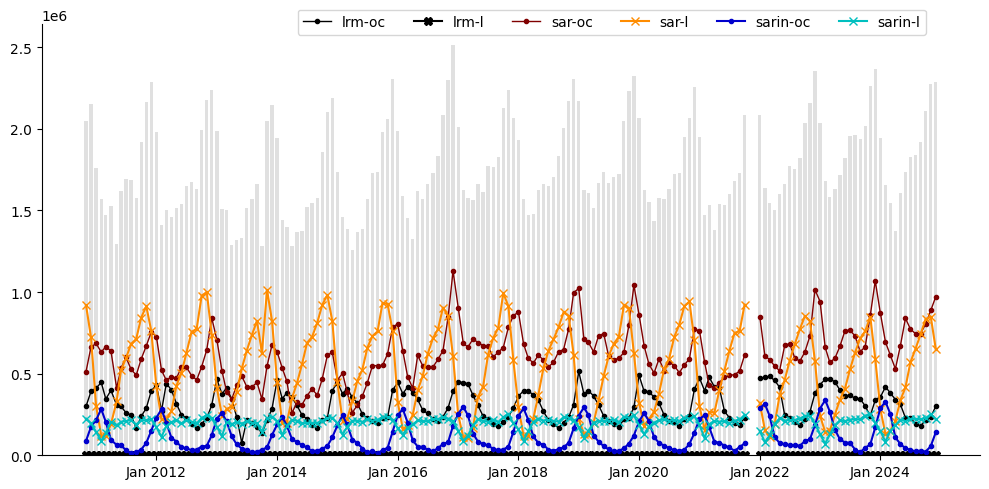

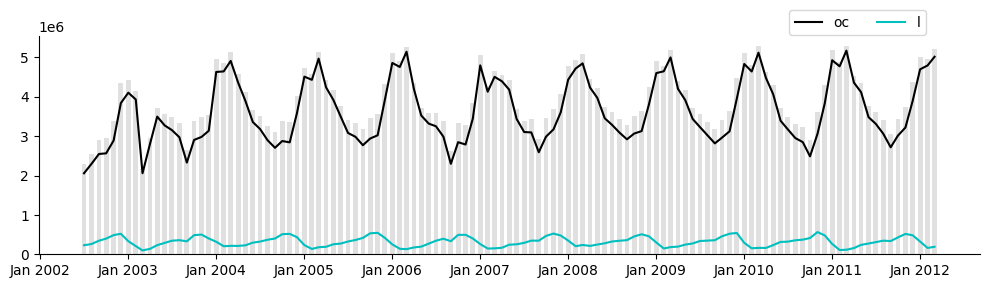

In [2]:
"""
Look at the number of samples in every month and how they are distributed
across the retrackers after removing data less than 10 km away from coastline.


Last modified: 24 Mar 2023
"""

import numpy as np
from numpy import ma

from netCDF4 import Dataset, num2date

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import datetime

import sys
# --------------------------------------------------------
# Directories
workdir = '/Users/iw2g24/PycharmProjects/CS2_extension/PhD/PhD_data/'
ncdir = workdir + 'altimetry_cpom/1_raw_nc/'
coastdir = workdir + 'land_masks/holland_vic/'
figdir = ncdir + 'nc_figures/'

# filenames
filenamespath = '/Users/iw2g24/PycharmProjects/CS2_extension/PhD/PhD_scripts/aux_func/'
sys.path.append(filenamespath)
from aux_1_filenames import cs2_id_list, env_id_list

time_units = 'days since 1950-01-01 00:00:00.0'


# # ENVISAT
# # -----------------------------------------------------------------------------
itt = len(env_id_list)
print("Number of ENVISAT files: %s" % itt)

ntot_env, num_env, num_o_env, num_l_env, time_env = [ma.zeros((itt)) for _ in range(5)]

skipped_files_env = []

for i in range(itt):
    filename = ncdir + env_id_list[i] + '.nc'

    print("processing "+env_id_list[i])

    ds = Dataset(filename, 'r+')
    #print(ds.variables.keys())

    if 'SurfaceType' not in ds.variables:
        print(f"'SurfaceType' not found in {filename}. Skipping...")
        skipped_files_env.append(filename)
        ds.close()
        continue

    surf = ds['SurfaceType'][:]
    dist = ds['distance_m'][:]

    print('dist:', dist)

    # I added this to avoid the conversion of masked element to nan
    # surf = ds['SurfaceType'][:]
    # surf = surf.filled(np.nan) if ma.isMaskedArray(surf) else surf
    #
    # dist = ds['distance_m'][:]
    # dist = dist.filled(np.nan) if ma.isMaskedArray(dist) else dist

    time_env[i] = ds['Time'][:][0]
    ds.close()

    # TOTAL number of points to start with
    ntot_env[i] = len(surf)

    #pick only points further than 10 km from the coastline
    surf = surf[dist>1e4]

    # split into O-L
    ocean = surf[surf==1]
    leads = surf[surf==2]

    num_env[i] = len(surf)
    num_o_env[i] = len(ocean)
    num_l_env[i] = len(leads)

# Print all skipped files after the loop
if skipped_files_env:
    print("\nSkipped files (missing 'SurfaceType'):")
    for f in skipped_files_env:
        print(f)
else:
    print("\nNo files were skipped.")

ntot_env = ma.masked_equal(ntot_env, 0)
num_env = ma.masked_equal(num_env, 0)
num_o_env = ma.masked_equal(num_o_env, 0)
num_l_env = ma.masked_equal(num_l_env, 0)
# num_o_env = ma.masked_equal(num_o_env, np.nan)
# num_l_env = ma.masked_equal(num_l_env, np.nan)


# CS2
# -----------------------------------------------------------------------------
itt = len(cs2_id_list)
print("Number of CryoSat-2 files: %s" % itt)

ntot, num_cs2, no_lrm, nl_lrm, no_sar, nl_sar, no_sarin, nl_sarin = [np.zeros((itt)) for
                                                           _ in range(8)]
time_cs2 = ma.zeros((itt))

skipped_files_cs2 =[]

for i in range(itt):
    filename = ncdir + cs2_id_list[i] + '.nc'
    print("Reading file %s" % filename)
    print("processing "+filename)

    ds = Dataset(filename, 'r+')
    #print(ds.variables.keys())
    #print(ds.groups.keys())  # List all groups in the dataset

    if 'SurfaceType' not in ds.variables:
        print(f"'SurfaceType' not found in {filename}. Skipping...")
        skipped_files_cs2.append(filename)
        ds.close()
        continue

    surf = ds['SurfaceType'][:]
    dist = ds['distance_m'][:]
    lat = ds['Latitude'][:]
    retracker = ds['Retracker'][:]

    # #i added this to avoid convertion of masked element error
    # surf = ds['SurfaceType'][:]
    # surf = surf.filled(np.nan) if ma.isMaskedArray(surf) else surf
    #
    # dist = ds['distance_m'][:]
    # dist = dist.filled(np.nan) if ma.isMaskedArray(dist) else dist
    #
    # lat = ds['Latitude'][:]
    # lat = lat.filled(np.nan) if ma.isMaskedArray(lat) else lat
    #
    # retracker = ds['Retracker'][:]
    # retracker = retracker.filled(np.nan) if ma.isMaskedArray(retracker) else retracker

    print(dist)

    time_cs2[i] = ds['Time'][:][0]


    # total number of points
    ntot[i] = len(surf)

    #discard points less than 10km away from coastline
    surf = surf[dist>1e4]
    lat = lat[dist>1e4]
    retracker = retracker[dist>1e4]

    num_cs2[i] = len(surf)
    # split into O-L
    # ------------------------------------
    o_lat, l_lat = lat[:], lat[:]

    o_lat[surf==2] = ma.masked
    l_lat[surf==1] = ma.masked

    # -------------------------------------
    LRM_o_lat = o_lat[retracker==1]
    LRM_l_lat = l_lat[retracker==1]

    SAR_o_lat = o_lat[retracker==2]
    SAR_l_lat = l_lat[retracker==2]

    SARin_o_lat = o_lat[retracker==3]
    SARin_l_lat = l_lat[retracker==3]

    no_lrm[i] = ma.count(LRM_o_lat)
    nl_lrm[i] = ma.count(LRM_l_lat)
    no_sar[i] = ma.count(SAR_o_lat)
    nl_sar[i] = ma.count(SAR_l_lat)
    no_sarin[i] = ma.count(SARin_o_lat)
    nl_sarin[i] = ma.count(SARin_l_lat)

# Print all skipped files after the loop
if skipped_files_cs2:
    print("\nSkipped files (missing 'SurfaceType'):")
    for f in skipped_files_cs2:
        print(f)
else:
    print("\nNo files were skipped.")

print('ntot',ntot)
print('num_cs2',num_cs2)
print('no_lrm',no_lrm)
print('nl_lrm',nl_lrm)

ntot = ma.masked_equal(ntot, 0)
num_cs2 = ma.masked_equal(num_cs2, 0)
no_lrm = ma.masked_equal(no_lrm, 0)
nl_lrm = ma.masked_equal(nl_lrm, 0)
no_sar = ma.masked_equal(no_sar, 0)
nl_sar = ma.masked_equal(nl_sar, 0)
no_sarin = ma.masked_equal(no_sarin, 0)
nl_sarin = ma.masked_equal(nl_sarin, 0)

# # I change the 0s to np.nan to try to avoid the conversion error
# ntot = ma.masked_equal(ntot, 0)
# num_cs2 = ma.masked_equal(num_cs2, 0)
# no_lrm = ma.masked_equal(no_lrm, np.nan)
# nl_lrm = ma.masked_equal(nl_lrm, np.nan)
# no_sar = ma.masked_equal(no_sar, np.nan)
# nl_sar = ma.masked_equal(nl_sar, np.nan)
# no_sarin = ma.masked_equal(no_sarin, np.nan)
# nl_sarin = ma.masked_equal(nl_sarin, np.nan)
#------------------------------------------------------
# time axis
date_cs2 = num2date(time_cs2, units=time_units,
                    calendar='gregorian',
                    only_use_cftime_datetimes=False)
date_env = num2date(time_env, units=time_units,
                    calendar='gregorian',
                    only_use_cftime_datetimes=False)


#------------------------------------------------------
# #check for masked arrays
# arrays_to_check = [ntot, num_cs2, no_lrm, nl_lrm, no_sar, nl_sar, no_sarin, nl_sarin]
#
# for arr in arrays_to_check:
#     if isinstance(arr, np.ma.MaskedArray):
#         print(f"Warning: Masked array detected in {arr}")

# ------------------------------------------------------
# fraction of data points that are less than 10 km away from coastline
# CS2
print('ntot', ntot)
print('num_cs2', num_cs2)
cs2_on_land = (ntot - num_cs2)
ntotn = (ntot)

cs2_fr_on_land = cs2_on_land / ntot
print('cs2 on land',cs2_fr_on_land)
print('dist', dist)


# np.nan to avoid conversion mask error
# cs2_on_land = ma.filled(cs2_on_land, np.nan)
# ntot = ma.filled(ntot, np.nan)
# cs2_fr_on_land = cs2_on_land / ntot


fig, ax = plt.subplots(figsize=(10,3))
ax.plot(date_cs2, cs2_fr_on_land*100, c='k', marker='o',
        markersize=3, lw=1)
ax.set_ylabel("%")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.tight_layout()

#ENV
# uncomment 4 lines if this doesn't work after 19/5/25
env_on_land = ntot_env - num_env
print('env_on_land', env_on_land)
env_fr_on_land = env_on_land / ntot_env
print('env_fr_on_land', env_fr_on_land)


# np.nan to avoid conversion mask error
# env_on_land = ma.filled(env_on_land, np.nan)
# ntot_env = ma.filled(ntot_env, np.nan)
# env_fr_on_land = env_on_land / ntot_env


fig, ax = plt.subplots(figsize=(10,3))
ax.plot(date_env, env_fr_on_land*100, c='k', marker='o',
        markersize=3, lw=1)
ax.set_ylabel("%")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.tight_layout()

#------------------------------------------------------
# total number of data every month and how they're split between modes/O-L

cs2_total_num = ma.sum(num_cs2)
cs2_fr_total = num_cs2/cs2_total_num

env_total_num = ma.sum(num_env)
env_fr_total = num_env/env_total_num

nmax = np.max(np.concatenate([num_cs2, num_env]))
cs2_fr_max = num_cs2/nmax
env_fr_max = num_env/nmax

#-------------------
#-------------------
plt.ion()
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(date_cs2, num_cs2,
       width=20,
       facecolor='lightgrey',
       alpha=0.7)
ax.plot(date_cs2, no_lrm, c='k', marker='o', markersize=3, lw=1, label='lrm-oc')
ax.plot(date_cs2, nl_lrm, c='k', marker='X', label='lrm-l')
ax.plot(date_cs2, no_sar, c='maroon', marker='o', markersize=3, lw=1, label='sar-oc')
ax.plot(date_cs2, nl_sar, c='darkorange', marker='x',  label='sar-l')
ax.plot(date_cs2, no_sarin, c='mediumblue', marker='o', markersize=3, label='sarin-oc')
ax.plot(date_cs2, nl_sarin, c='c', marker='x', label='sarin-l')

ax.legend(ncol=6, loc='upper right', bbox_to_anchor=(.95, 1.05))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.spines[['right', 'top']].set_visible(False)
plt.tight_layout()

#-------------------

fig, ax = plt.subplots(figsize=(10, 3))
ax.bar(date_env, num_env,
       width=20,
       facecolor='lightgrey',
       alpha=0.7)
ax.plot(date_env, num_o_env, c='k', label='oc')
ax.plot(date_env, num_l_env, c='c', label='l')
ax.legend(ncol=6, loc='upper right', bbox_to_anchor=(.95, 1.15))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.spines[['right', 'top']].set_visible(False)
plt.tight_layout()
